#### Exercice 21

>      MOV R0, #.red
>      STR R0, .Pixel0 // coin supérieur gauche
>      MOV R0, #.green
>      STR R0, .Pixel31 // coin supérieur droit
>      MOV R0, #.blue
>      STR R0, .Pixel736 // coin inférieur gauche (23 * 32)
>      MOV R0, #.pink
>      STR R0, .Pixel767 // coin inférieur droit 736 + 31
>      HALT

> 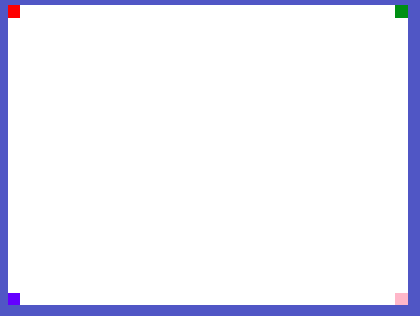
____

#### Exercice 22

>        //R0 multiple usage 
>        //R8 nombre de lettres incorrectes
>          MOV R8, #10
>        drawPic:
>          CMP R8, #1
>          BLT endDraw
>          MOV R0, #.brown
>          STR R0, .Pixel739 //potence
>          STR R0, .Pixel707
>          STR R0, .Pixel675
>          STR R0, .Pixel643
>          STR R0, .Pixel611
>          STR R0, .Pixel579
>          STR R0, .Pixel547
>          STR R0, .Pixel515
>          STR R0, .Pixel483
>          STR R0, .Pixel451
>          CMP R8, #2
>          BLT endDraw
>          STR R0, .Pixel452 //bras de potence
>          STR R0, .Pixel453
>          STR R0, .Pixel454
>          STR R0, .Pixel455
>          CMP R8, #3
>          BLT endDraw
>          MOV R0, #0xdcd6bb //gris orange
>          STR R0, .Pixel487 //corde
>          CMP R8, #4
>          BLT endDraw
>          MOV R0, #0xffc0cb //gris orange
>          STR R0, .Pixel519 //tete
>          CMP R8, #5
>          BLT endDraw
>          MOV R0, #.blue
>          STR R0, .Pixel551 //corps
>          STR R0, .Pixel583
>          STR R0, .Pixel615
>          CMP R8, #6
>          BLT endDraw
>          STR R0, .Pixel646 //jambe gauche
>          STR R0, .Pixel678
>          STR R0, .Pixel710
>          CMP R8, #7
>          BLT endDraw
>          STR R0, .Pixel648 //jambe droite
>          STR R0, .Pixel680
>          STR R0, .Pixel712
>          CMP R8, #8
>          BLT endDraw
>          STR R0, .Pixel550 //bras gauche
>          STR R0, .Pixel581
>          CMP R8, #9
>          BLT endDraw
>          STR R0, .Pixel552 //bras droit
>          STR R0, .Pixel585
>          CMP R8, #10
>          BLT endDraw
>          MOV R0, #.black //mort!
>          STR R0, .Pixel519
>          
>        endDraw:
>          HALT

> 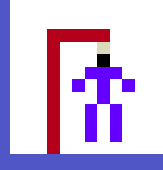
_________

#### Exercice 23

Pour mémoire:

```
captureWord:
    MOV R0, #setter
    STR R0, .WriteString
    MOV R0, #secretWord
    STR R0, .ReadSecret
    HALT
setter: .ASCIZ "Questionneur: Saisir votre mot\n"
secretWord:
```

Faire une copie d'écran qui met en évidence la position en mémoire du mot secret en indiquant séparemment comment cela correspond aux valeurs ASCII des quatre caractères qui le forme.

> 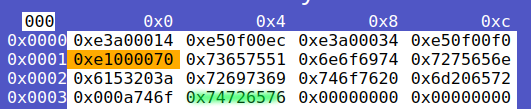
> 
> le mot saisi a été placé à l'adresse 0x34 on l'on voit 0x74726576; on peut le décoder à l'aide d'une portion de table ASCII
>
> 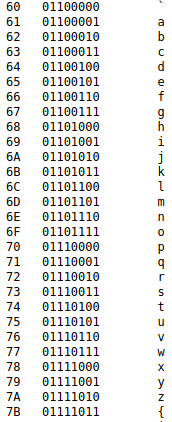 
> 
> Ainsi: 74 -> t; 72 -> r; 65 -> e; 76 -> v ; on peut deviner que le mot saisi est "vert". Noter en passant l'ordre little endian de l'ARMlite: les octets sont numérotés en commençant par le «petit bout» (bits de poids faibles).

Directive `.ALIGN`

> ```
> captureWord:
>    MOV R0, #setter
>    STR R0, .WriteString
>    MOV R0, #secretWord
>    STR R0, .ReadSecret
>    HALT
> setter: .ASCIZ "Questionneur: Saisir votre mot\n"
> .ALIGN 512
> secretWord:
> ```

copie d'écran partielle qui montre la version encodé du mot saisi à sa nouvelle adresse mémoire `0x00020`.

> 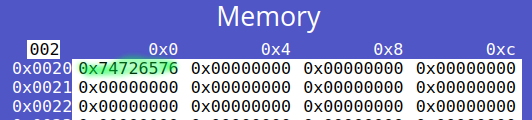

Enfin, assurez-vous d'avoir remis la page mémoire à son numéro initial 000 pour la suite du jeu!
____________

#### Exercice 24

> <a href="pendu_complet.txt">code complet</a>

Faites une copie d'écran de l'ARMlite en mode "player".

> 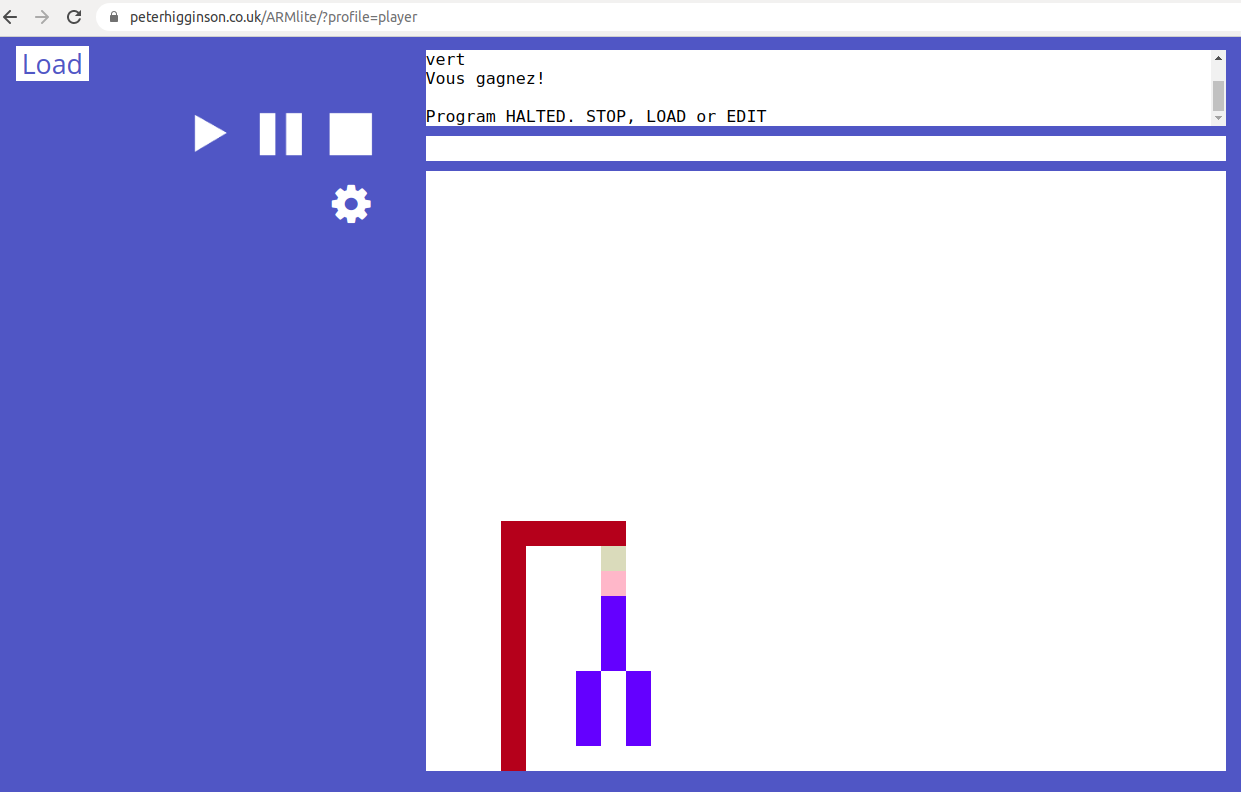

Observations sur la façon dont le code fonctionne:

> Le code débute par la gestion de la saisie du mot secret (lignes 13-17).
> 
> La saisie du joueur est gérée et placée dans R2 (24-28). À l'aide d'un masque (R5), on sélectionne l'une des quatre lettres du mot partiel (R3)  puis, si besoin (l'octet du mot partiel est nul), du mot secret (44-45): la lettre sélectionnée est placée en R0 puis comparée à la lettre courante en R2 (49).

> Dans tous les cas on écrit soit un caractère souligné (pas de correspondance), soit le caractère trouvé précédemment (l'octet du mot partiel est non nul), soit le nouveau caractère découvert (et on met à jour le mot partiel ligne 51); en cas de succès on lève un drapeau (ligne 53). 

> Au bout de ce processus (ligne 67 et suivantes), on vérifie le drapeau. En cas de succès, on incrémente le nombre de lettres trouvées (R9) et on vérifie si
> le joueur a gagné; sinon on incrémente le nombre d'erreurs puis on refait le dessin et enfin soit on demande la saisie d'une nouvelle 
> lettre, soit on arrête le jeu avec la mention perdue.
_____

#### Exercice 25

> Demander aux joueurs s'ils veulent rejouer et en cas de réponse favorable réinitialiser le jeu.

> Permettre de saisir un mot secret de longueur variable (mais voir notes à la fin de la partie cours).

> Améliorer le graphisme du pendu,

> ...
____